## Q1

In [ ]:
# Do NOT modify this block of code

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [ ]:
# Do NOT modify this block of code
n = 200

rand_x = np.random.RandomState(0)
x = rand_x.randint(1, 100, (n, 1))

rand_noise = np.random.RandomState(10)
y = 2.13 * x - 50.84 + 10*rand_noise.randn(n, 1)

In [ ]:
def fit_regression_line(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:

    ## Your code starts here ##
    x = x.flatten()
    y = y.flatten()
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    beta_1 = np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2)

    beta_0 = y_bar - beta_1 * x_bar

    return np.array([beta_0, beta_1])
    ## end ##



In [ ]:
# Do NOT modify this block of code.
# If this code cell run without any 'AssertionError', then your function 'fit_regression_line' is returning a numpy array with the correct shape.
assert fit_regression_line(x, y).shape == (2, )

In [ ]:
# Do NOT modify this block of code
def rmse(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return np.sqrt(np.mean((y - y_hat)**2))

print(f"RMSE score is: {np.round(rmse(x, y), 4)}")

RMSE score is: 9.7621


In [ ]:
# Do NOT modify this block of code
def r_squared(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return (np.corrcoef(y_hat, y, rowvar=False)[0, 1])**2

print(f"R-Squared score is: {np.round(r_squared(x, y), 4)}")

R-Squared score is: 0.9737


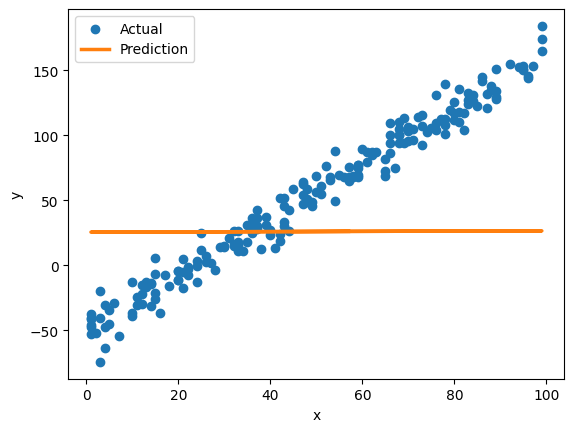

In [ ]:
# Do NOT modify this block of code
def plot_predictions(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> None:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    plt.scatter(x.flatten(), y.flatten(), color=plt.cm.tab10(0), label='Actual')
    plt.plot(x.flatten(), y_hat.flatten(), color=plt.cm.tab10(1), linewidth=2.5, label='Prediction')

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

plot_predictions(x, y)

In [ ]:
# Do NOT modify this block of code

import pandas as pd

## Q2(a)

In [ ]:
# Do NOT modify this block of code

import seaborn as sns

iris_df = sns.load_dataset('iris')
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
## Your code starts here ##
for column in iris_df.select_dtypes(include=['float64']).columns:
    mean_column = iris_df[column].mean()
    std_column = iris_df[column].std()
    iris_df[column] = (iris_df[column] - mean_column)/std_column
print (iris_df.head())

## end ##

   sepal_length  sepal_width  petal_length  petal_width species
0     -0.897674     1.015602     -1.335752    -1.311052  setosa
1     -1.139200    -0.131539     -1.335752    -1.311052  setosa
2     -1.380727     0.327318     -1.392399    -1.311052  setosa
3     -1.501490     0.097889     -1.279104    -1.311052  setosa
4     -1.018437     1.245030     -1.335752    -1.311052  setosa


## Q2(b)

In [ ]:
## Your code starts here ##
iris_df['mean_zscore'] = iris_df.select_dtypes(include=['float64']).mean(axis=1)
sorted_iris_df = iris_df.sort_values(by='mean_zscore', ascending=False)
print(sorted_iris_df.head())
## end ##

     sepal_length  sepal_width  petal_length  petal_width    species  \
117      2.242172     1.703886      1.666574     1.312801  virginica   
131      2.483699     1.703886      1.496631     1.050416  virginica   
109      1.638355     1.245030      1.326688     1.706379  virginica   
135      2.242172    -0.131539      1.326688     1.443994  virginica   
105      2.121409    -0.131539      1.609926     1.181609  virginica   

     mean_zscore  
117     1.731358  
131     1.683658  
109     1.479113  
135     1.220329  
105     1.195351  


## Q2(c)

In [ ]:
## Your code starts here ##
species_max_zscores = iris_df.groupby('species')['mean_zscore'].apply(lambda x: x.abs().max()).sort_values()
print(species_max_zscores)
## end ##

species
versicolor    0.962980
setosa        1.483012
virginica     1.731358
Name: mean_zscore, dtype: float64
